# Single transit & variability

## Simulate data

/Users/lgrcia/code/dev/nuance/nuance/nuance.py:14: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


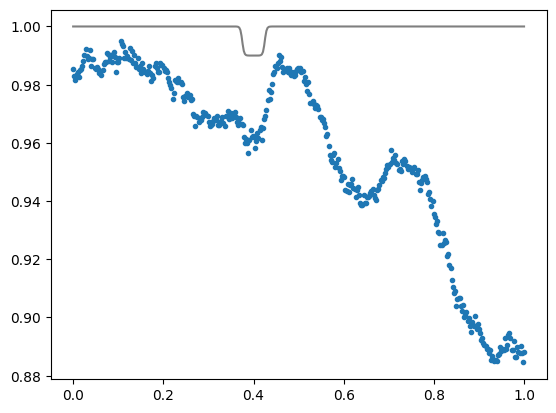

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jax
from nuance.utils import transit
from tinygp import kernels, GaussianProcess

time = np.linspace(0, 1, 400)
diff_error = 0.001

kernel = kernels.quasisep.Cosine(0.3, 0.01) + kernels.quasisep.Exp(1., 0.02)
gp = GaussianProcess(kernel, time, mean=0., diag=diff_error**2)
variability = gp.sample(jax.random.PRNGKey(4), shape=(1,))[0]
X = np.vander(time, N=4, increasing=True)
w = [1., 0.004, -0.05, -0.05]
true = {"t0": 0.4, "D": 0.05}
depth = 0.01
true_transit = depth * transit(time, **true)
diff_flux= variability +  true_transit + X@w
plt.plot(time, true_transit+1, c="k", alpha=0.5)

plt.plot(time, diff_flux, ".")

# Linear search

In [4]:
from nuance import Nuance

nu = Nuance(time, diff_flux, X=X.T, gp=gp)

t0s = time.copy()
Ds = np.linspace(0.01, 0.1, 10)
nu.linear_search(t0s, Ds)

100%|██████████| 400/400 [00:00<00:00, 958.23it/s]


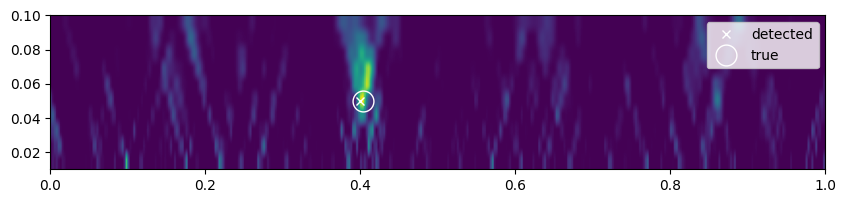

In [5]:
plt.figure(None, (10, 2))
T, D, _ = nu.search_data.best
nu.search_data.show_ll()
plt.plot(true["t0"], true["D"], "x", c="w", label="detected")
plt.plot(T, D, "o", fillstyle="none", ms=15, c="w", label="true")
plt.legend()